# Kindle data: data pre-processing
---

Before inputting our data straight into any neural network, it is important to get a grasp of the raw data and investigate any necessary amendments.

In [13]:
# imports
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt

In [1]:
# scraping data from online repository

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

### The below cell takes a VERY long time to run, since we are scraping extracting the (very large) dataset from the online source. You have been warned!

In [2]:
df = getDF('Kindle_Store_5.json.gz')

In [3]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,NaN


In [4]:
df.describe()

,overall,unixReviewTime
count,2.222983e+06,2.222983e+06
mean,4.394687e+00,1.433041e+09
std,9.260669e-01,4.430677e+07
min,1.000000e+00,8.820576e+08
25%,4.000000e+00,1.404778e+09
50%,5.000000e+00,1.434672e+09
75%,5.000000e+00,1.462234e+09
max,5.000000e+00,1.538525e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222983 entries, 0 to 2222982
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   style           object 
 6   reviewerName    object 
 7   reviewText      object 
 8   summary         object 
 9   unixReviewTime  int64  
 10  vote            object 
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 205.6+ MB


In [7]:
# cleaning up the dataset

# only include verified reviews
df_new = df[df["verified"] == True]

In [8]:
# removing unnecessary columns
df_new = df_new[["overall", "reviewTime", "reviewText", "summary"]]

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1418037 entries, 0 to 2222982
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   overall     1418037 non-null  float64
 1   reviewTime  1418037 non-null  object 
 2   reviewText  1417696 non-null  object 
 3   summary     1417127 non-null  object 
dtypes: float64(1), object(3)
memory usage: 54.1+ MB


In [11]:
df_new.head()

,overall,reviewTime,reviewText,summary
0,4.0,"07 3, 2014","pretty good story, a little exaggerated, but I...",pretty good story
1,5.0,"05 26, 2014","If you've read other max brand westerns, you k...",A very good book
2,5.0,"09 16, 2016","Love Max, always a fun twist",Five Stars
3,5.0,"03 3, 2016","As usual for him, a good book",a good
4,5.0,"09 10, 2015",MB is one of the original western writers and ...,A Western


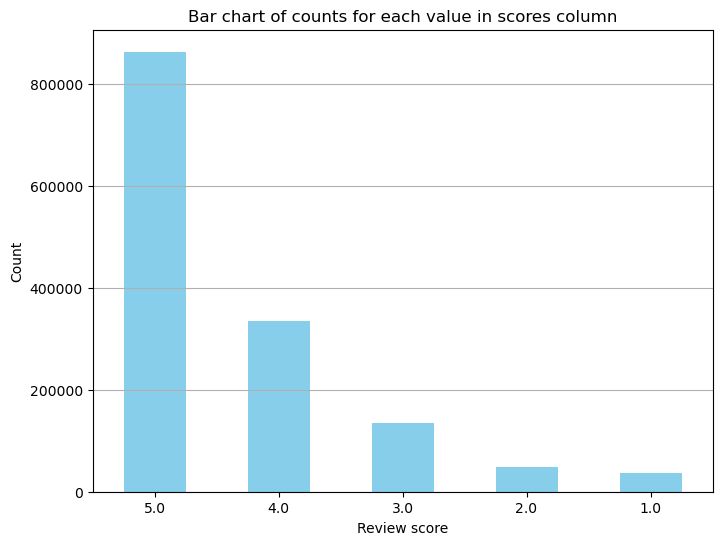

In [17]:
value_counts = df_new['overall'].value_counts()

# Plotting bar chart of counts for each value in 'Category' column
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar chart of counts for each value in scores column')
plt.xlabel('Review score')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.grid(axis='y')
plt.show()

An imbalance dataset will make it extremely difficult for our resultant model to learn properly. We utilise the method of undersampling to rectify this issue the best we can:

In [24]:
count_specific_value = (df_new['overall'] == 1).sum()
print(count_specific_value)

36293


In [26]:
count_other_values = (df_new['overall'] == 2).sum()
print(count_other_values)

49397


In [27]:
df_new.overall.unique()

array([4., 5., 3., 2., 1.])

In [31]:
# Calculate the minimum count among the different score values
min_count = df_new['overall'].value_counts().min()

# Undersample each score value to have the same count as the minimum count
balanced_df = pd.concat([
    df_new[df_new['overall'] == score].sample(min_count) for score in df_new['overall'].unique()
])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

In [33]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181465 entries, 0 to 181464
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     181465 non-null  float64
 1   reviewTime  181465 non-null  object 
 2   reviewText  181439 non-null  object 
 3   summary     181395 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


In [35]:
balanced_df.head()

,overall,reviewTime,reviewText,summary
0,4.0,"08 19, 2014","Very helpful on healing plants, could read it ...",Good reference book for anyone wanting to know...
1,4.0,"08 23, 2014",Good read,Four Stars
2,3.0,"07 24, 2013",Some of the chapters in this book were very us...,"Some good, some not so....."
3,5.0,"02 23, 2014",L.O.V.E.D!!!!!! I absolutely love this erotic...,L.O.V.E.D
4,4.0,"11 24, 2013",I am not sure why I got sucked in to this from...,very good start..


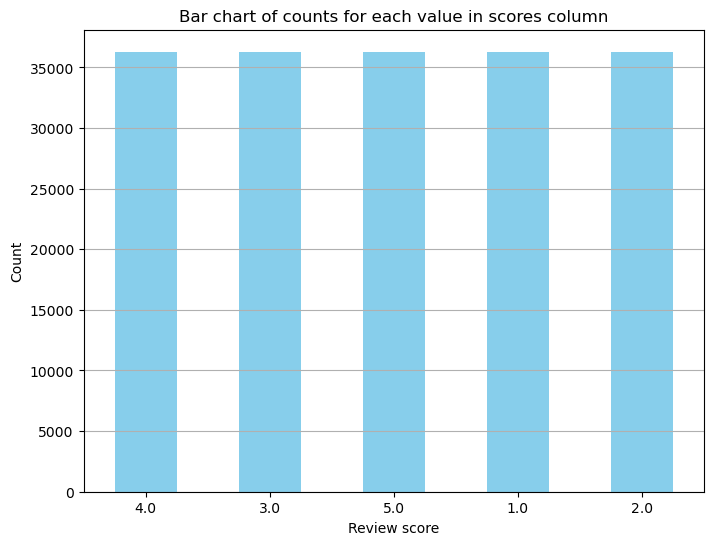

In [34]:
value_counts_balanced = balanced_df['overall'].value_counts()

# Plotting bar chart of counts for each value in 'Category' column
plt.figure(figsize=(8, 6))
value_counts_balanced.plot(kind='bar', color='skyblue')
plt.title('Bar chart of counts for each value in scores column')
plt.xlabel('Review score')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.grid(axis='y')
plt.show()

In [36]:
balanced_df.to_csv("kindle_balanced.csv")